In [1]:
import pandas as pd
import networkx as nx
import collections
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import random
from pandas.plotting import table
import matplotlib.image as mpimg
from io import BytesIO
import graphviz
import pylab


In [23]:
df_ciclos_diretos = pd.read_csv('/home/gustavo/Downloads/Redes/Tabelas_Gerada/df_ciclos_diretos.csv', delimiter = ',')

In [24]:
df_ciclos_diretos

,Unnamed: 0,1_id_empresa,2_nome_empresa,3_nome_deputado,4_valor_doado,5_qtde_doacoes,6_valor_reembolsado,7_qtde_reembolsos,8_percentual_retorno
0,0,13524791000109,JL Consultores,DIONILSO MATEUS MARCON,750.00,1,36000.00,1,4700.00
1,1,4707821000113,SOJA COMERCIO DE DERIVADOS DE PETROLEO LTDA,LUCIO ANTONIO MOSQUINI,27350.00,1,241.22,1,-99.12
2,2,20629347000105,STAR TUR VIAGENS E TURISMO LTDA-EPP,LUCIO ANTONIO MOSQUINI,49500.00,1,3610.00,1,-92.71
3,3,11601349000103,E.M COMERCIO DE COMBUSTIVEIS LTDA,LUCIO ANTONIO MOSQUINI,9996.00,1,183.74,1,-98.16
4,4,24186785000105,SOMAPETRO COMERCIO E TRANSPORTES LTDA,CARLOS ALBERTO DE SOUSA ROSADO SEGUNDO,58000.00,3,196.03,1,-99.66
5,5,12053850000137,GRAAL OURINHOS,JOSE AUGUSTO ROSA,5000.00,1,410.55,2,-91.79
6,6,87687489000108,POSTO DE COMBUSTIVEIS VACCARI LTDA,ELVINO JOSE BOHN GASS,1250.14,1,2824.33,13,125.92
7,7,84841931000102,AJIR ARTES GRAFICAS E EDITORA LTDA - EPP,CHRISTIANE DE SOUZA YARED,380.00,2,750.00,1,97.37
8,8,4197917368,YARA MARIA LIRA PAIVA E SILVA,ATILA FREITAS LIRA,300.00,1,7200.00,12,2300.00
9,9,83336532191,Marcones Ribeiro de Castro,VICENTE ALVES DE OLIVEIRA JUNIOR,8500.00,2,10000.00,2,17.65


In [25]:
df1 = df_ciclos_diretos.sort_values('8_percentual_retorno', ascending=False)
df2 = df1.loc[0:10]

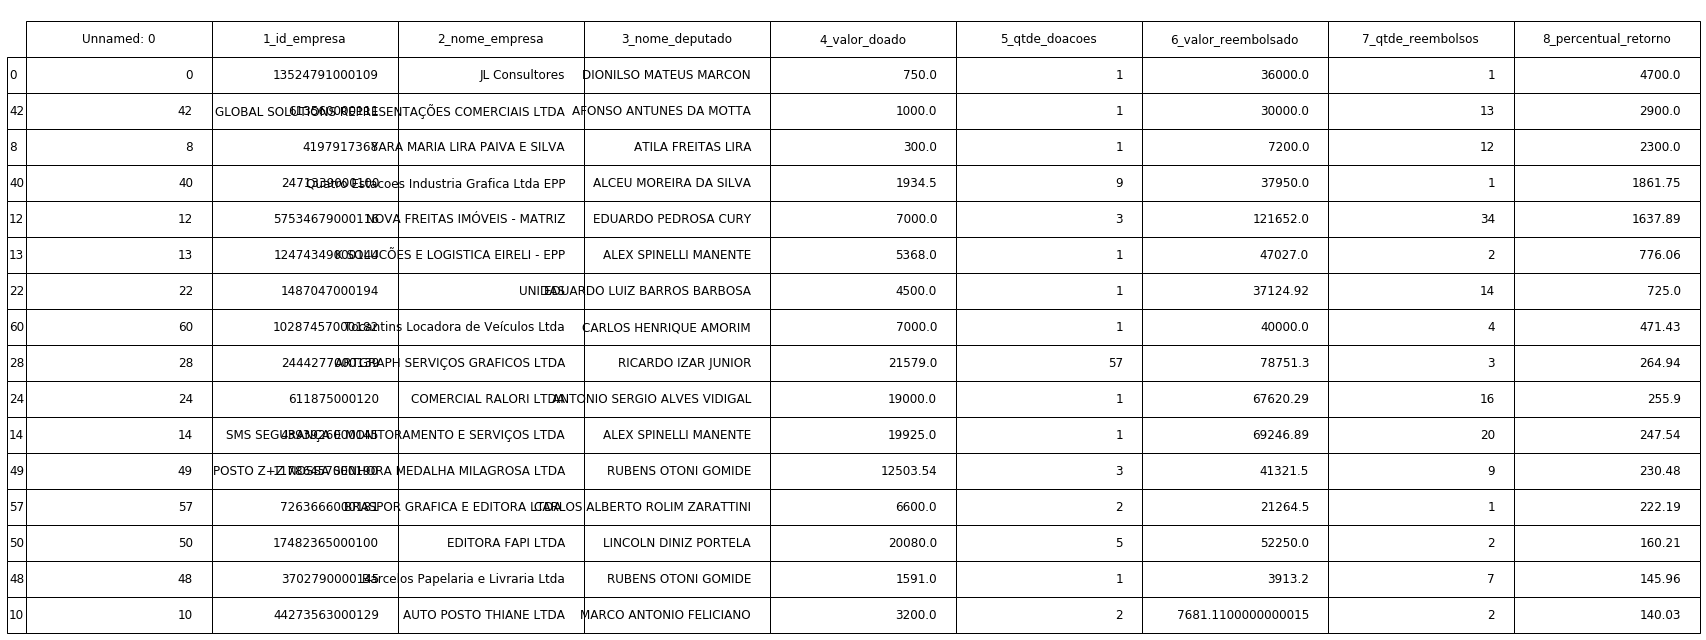

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

ax.set_frame_on(False)
tabela = table(ax, df2, loc='upper center')
tabela.auto_set_font_size(False) # Activate set fontsize manually
tabela.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabela.scale(3,3) # change size table
plt.savefig('mytable.png')

In [27]:
#df_ciclos_diretos['peso'] = df_ciclos_diretos['8_percentual_retorno'].apply(
#lambda x: round(np.log(x),3))
df_ciclos_diretos['log_valor_doado'] = df_ciclos_diretos['4_valor_doado'].apply(
lambda x: round(np.log(x),3))
df_ciclos_diretos['log_valor_reembolsado'] = df_ciclos_diretos['6_valor_reembolsado'].apply(
lambda x: round(np.log(x),3))

In [7]:
df_ciclos_diretos.sort_values('8_percentual_retorno')

,1_id_empresa,2_nome_empresa,3_nome_deputado,4_valor_doado,5_qtde_doacoes,6_valor_reembolsado,7_qtde_reembolsos,8_percentual_retorno,log_valor_doado,log_valor_reembolsado
52,26198515000484,SEMPRE EDITORA LTDA.,MARCELO GUILHERME DE ARO FERREIRA,205634.40,80,251.40,5,-99.88,12.234,5.527
58,6985134000195,REDE DITO-COMERCIO DE COMB. E DERIV. DE PETROL...,CARLOS HENRIQUE AMORIM,200000.00,1,362.09,2,-99.82,12.206,5.892
45,37034014000136,GRECO COMÉRCIO DE FRANGOS LTDA,WALDIR SOARES DE OLIVEIRA,60000.00,1,160.85,1,-99.73,11.002,5.080
35,1059928000104,AUTO POSTO NUELE LTDA.,ANTONIO WANDSCHEER,150000.00,2,440.37,3,-99.71,11.918,6.088
4,24186785000105,SOMAPETRO COMERCIO E TRANSPORTES LTDA,CARLOS ALBERTO DE SOUSA ROSADO SEGUNDO,58000.00,3,196.03,1,-99.66,10.968,5.278
19,3006726000120,Auto Posto Piloto Marcelle Locatelli Ltda,VANDER LUIZ DOS SANTOS LOUBET,200000.00,2,1198.45,6,-99.40,12.206,7.089
37,8035554000136,POSTO CAMINHO DO PARQUE LTDA.,LUCIANO DUCCI,11596.00,1,100.00,1,-99.14,9.358,4.605
1,4707821000113,SOJA COMERCIO DE DERIVADOS DE PETROLEO LTDA,LUCIO ANTONIO MOSQUINI,27350.00,1,241.22,1,-99.12,10.216,5.486
30,3777848930,Fabio Antonio,SERGIO DE SOUZA,3000.00,1,44.00,3,-98.53,8.006,3.784
29,72820822000120,SKY BRASIL SERVIÇOS LTDA,ALESSANDRO LUCCIOLA MOLON,50000.00,1,745.84,11,-98.51,10.820,6.615


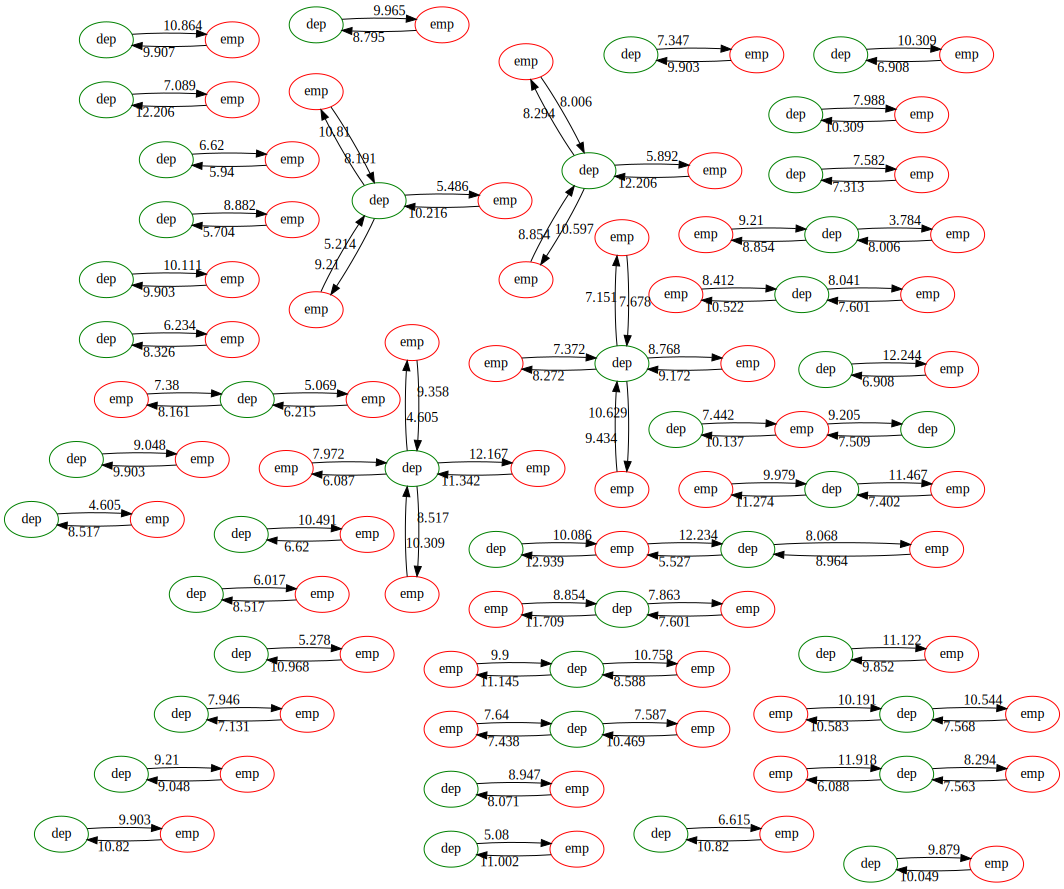

In [33]:
G = nx.MultiDiGraph()

G.add_nodes_from(df_ciclos_diretos['2_nome_empresa'], bipartite = 0)
empresa = [v for v in G.nodes if G.nodes[v]['bipartite'] == 0]
    
G.add_nodes_from(df_ciclos_diretos['3_nome_deputado'], bipartite = 1)
deputados = [v for v in G.nodes if G.nodes[v]['bipartite'] == 1]

G.add_weighted_edges_from(df_ciclos_diretos[['2_nome_empresa', '3_nome_deputado', 'log_valor_doado']].values)
G.add_weighted_edges_from(df_ciclos_diretos[['3_nome_deputado', '2_nome_empresa', 'log_valor_reembolsado']].values)


#Graphviz
d =graphviz.Digraph(format='png')
for n in deputados:
    d.node(str(n),color='green', label='dep')

for n in empresa:
    d.node(str(n),color='red', label='emp')


for (u,v,w) in G.edges(data='weight'):
    #dic = dict(G[u][v][w])
    d.edge(str(u), str(v), label=str(G[u][v][0]['weight']))
    

d.attr(size='40')

# To display the graph on Jupyter
d.engine='circo'
#d.render('/home/gustavo/Downloads/Redes/Imagens_trabalho/Retorno_direto')
d

In [9]:
G.number_of_nodes()

102

In [9]:
df_ciclos_diretos['1_id_empresa'].nunique()

60

In [11]:
df_ciclos_diretos['3_nome_deputado'].nunique()

42

In [12]:
G.number_of_edges()

124

In [13]:
nx.density(G)

0.012036497767423802

In [14]:
#Distribuição de grau
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) 
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

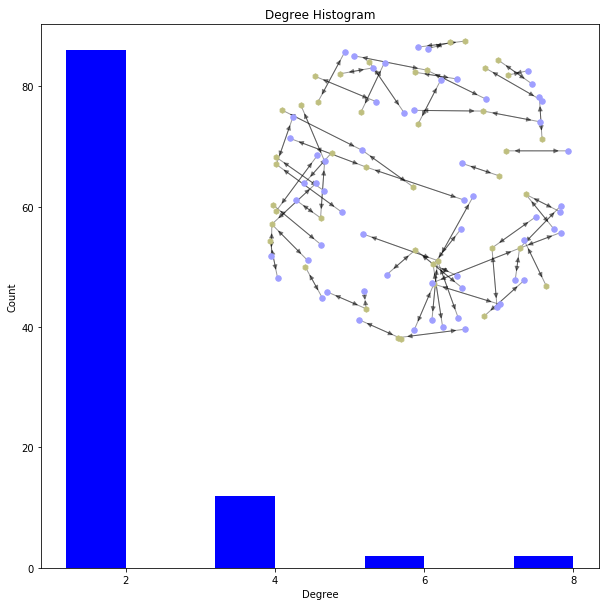

In [32]:
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.strongly_connected_component_subgraphs(G), key=len, reverse=True)[0]
plt.axis('off')
pos = nx.spring_layout(G, k=0.9)
nx.draw_networkx_nodes(G, pos, nodelist = deputados, node_color='#bfbf7f', node_shape="h", node_size=30)
nx.draw_networkx_nodes(G, pos, nodelist = empresa, node_color='#9f9fff', node_size=30)
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.savefig('/home/gustavo/Downloads/Redes/Imagens_trabalho/Distribuição_Grau_Retorno_direto.png')
plt.show()

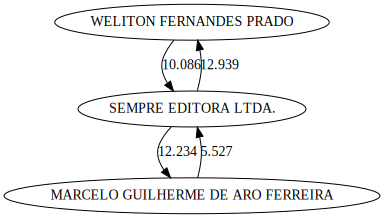

In [51]:
# 1.4.2.2. Plotando rede de ciclos diretos para um deputado específico
plt.rcParams.update({
    'figure.figsize': (10,10),
    'axes.spines.right': True,
    'axes.spines.left': True,
    'axes.spines.top': True,
    'axes.spines.bottom': True})


deputado = "RUBENS OTONI GOMIDE"
empresa = 'SEMPRE EDITORA LTDA.'
#lista_subset_graph = list(df_ciclos_diretos[df_ciclos_diretos["3_nome_deputado"] == deputado]['2_nome_empresa']) + [deputado]
lista_subset_graph = list(df_ciclos_diretos[df_ciclos_diretos["2_nome_empresa"] == empresa]['3_nome_deputado']) + [empresa]

H = G.subgraph(lista_subset_graph)
'''
nx.draw(H, style = "solid", with_labels = True)
plt.figure(figsize=(10,10))
plt.savefig("/home/gustavo/Downloads/Redes/Grafos/ciclos_LucianoDucci.png")  # save as png
plt.show()  # display
'''
dr = graphviz.Digraph(format='png')
for n in H.nodes():
    dr.node(str(n))
    
for v,u,w in H.edges(data='weight'):
    dr.edge(str(v), str(u),label=str(H[v][u][0]['weight']))
    
dr.engine
dr.render('/home/gustavo/Downloads/Redes/Imagens_trabalho/Sempre_RD')
dr


In [53]:
import operator
dic = dict(nx.degree_centrality(G))
dic = sorted(dic.items(), key = operator.itemgetter(1), reverse=True)
dict(dic)

{'LUCIANO DUCCI': 0.07920792079207921,
 'RUBENS OTONI GOMIDE': 0.07920792079207921,
 'LUCIO ANTONIO MOSQUINI': 0.0594059405940594,
 'CARLOS HENRIQUE AMORIM': 0.0594059405940594,
 'DELTA PUBLICIDADE S/A': 0.039603960396039604,
 'SEMPRE EDITORA LTDA.': 0.039603960396039604,
 'EDUARDO PEDROSA CURY': 0.039603960396039604,
 'ALEX SPINELLI MANENTE': 0.039603960396039604,
 'EDUARDO LUIZ BARROS BARBOSA': 0.039603960396039604,
 'RICARDO IZAR JUNIOR': 0.039603960396039604,
 'SERGIO DE SOUZA': 0.039603960396039604,
 'LEANDRE DAL PONTE': 0.039603960396039604,
 'ANTONIO WANDSCHEER': 0.039603960396039604,
 'ALCEU MOREIRA DA SILVA': 0.039603960396039604,
 'MARCELO GUILHERME DE ARO FERREIRA': 0.039603960396039604,
 'EROS FERREIRA BIONDINI': 0.039603960396039604,
 'JL Consultores': 0.019801980198019802,
 'SOJA COMERCIO DE DERIVADOS DE PETROLEO LTDA': 0.019801980198019802,
 'STAR TUR VIAGENS E TURISMO LTDA-EPP': 0.019801980198019802,
 'E.M COMERCIO DE COMBUSTIVEIS LTDA': 0.019801980198019802,
 'SOMAPETR

In [89]:
deg = dict(nx.degree_centrality(G))
degree = pd.DataFrame.from_dict(data=deg, orient='index')


dict_values([0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.039603960396039604, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.019801980198019802, 0.01980198019801980

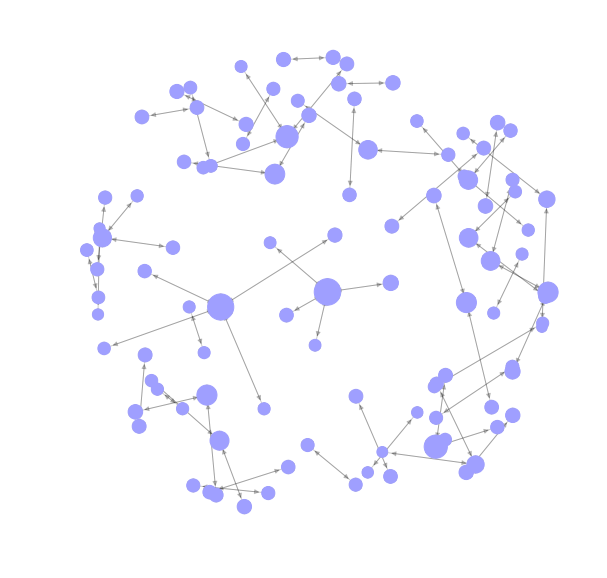

In [106]:
node = list()
degree = list()

for x,y in dic:
    node.append(x)
    degree.append(y)


plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos, nodelist = node, node_color='#bfbf7f', node_shape="h", node_size=[v*10 for v in degree])
nx.draw_networkx_nodes(G, pos, nodelist = node, node_color='#9f9fff', node_size=[v*10 for v in degree])
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.axis('off')
plt.show()

In [109]:
type(node)

list